In [ ]:
import colour
import numpy as np

np.random.seed(16)

colour_checker_reference = colour.CCS_COLOURCHECKERS[
    "ColorChecker24 - After November 2014"
]


colour.plotting.plot_single_colour_checker(
    "ColorChecker 1976"
);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[  4.00000000e+02   3.15639084e-02   3.69919681e-02 ...,   4.71789417e-02
    4.49064275e-02   4.60244383e-02]
 [  4.10000000e+02   1.53686092e-02   2.35587136e-02 ...,   3.66992436e-02
    3.32453014e-02   3.54860164e-02]
 [  4.20000000e+02   2.72679158e-03   1.33119932e-02 ...,   2.69470508e-02
    2.40285492e-02   2.62593266e-02]
 ..., 
 [  6.80000000e+02   3.37508210e-02   1.63405430e-01 ...,   3.96257513e-02
    3.08569233e-02   5.24964008e-02]
 [  6.90000000e+02   4.40075970e-02   1.65766335e-01 ...,   6.71006837e-02
    4.32763839e-02   5.65954227e-02]
 [  7.00000000e+02   4.58418056e-02   1.66543396e-01 ...,   1.09845578e-01
    6.06680953e-02   6.17683839e-02]]


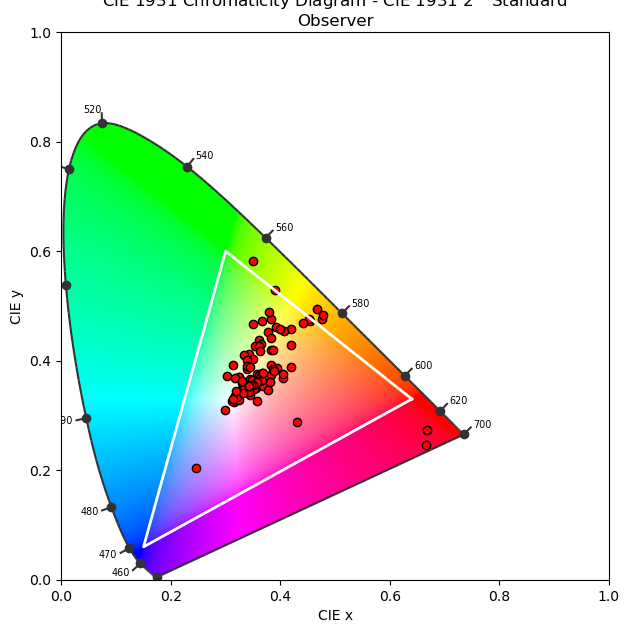

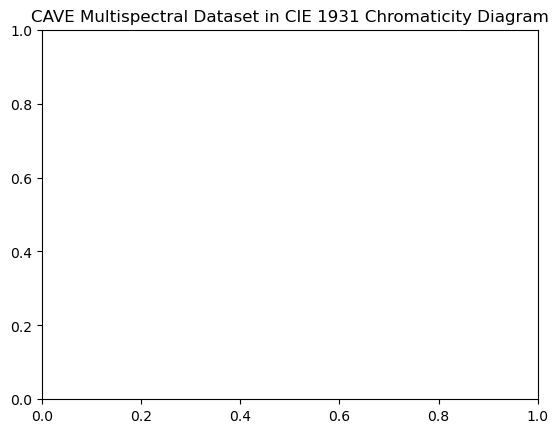

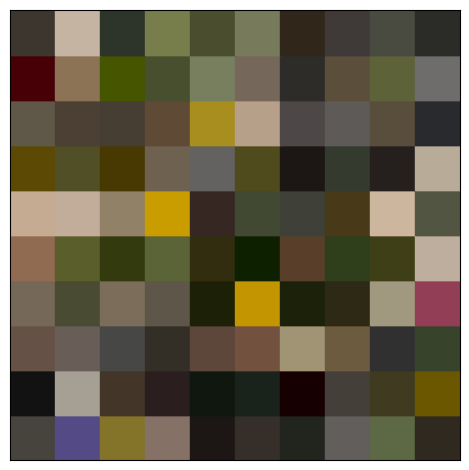

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [13]:
%load_ext autoreload
%autoreload 2

from data import load_dataset_sfu, load_dataset_csv, load_cmfs, load_insitu
import colour
import matplotlib.pyplot as plt
from plotting import plot_chromaticity_diagram
import numpy as np


cave = load_dataset_csv("data/foster50.csv")
# cave = load_dataset_sfu("data/reflect_db.reflect")
# cave = load_insitu("data/insitu_dataset.csv")
print(cave)
np.random.seed(2)

# plt.plot(cave.wavelengths, cave.values)

cmfs, illuminant = load_cmfs()
response_trainset_xyz = colour.characterisation.training_data_sds_to_XYZ(cave, cmfs, illuminant)

samples = np.random.choice(response_trainset_xyz.shape[0], 100)

selected_xyz = response_trainset_xyz[samples, :]

selected_srgb = colour.XYZ_to_sRGB(selected_xyz, illuminant="D65", chromatic_adaptation_transform=None)

plot_chromaticity_diagram(selected_xyz)
plt.title('CAVE Multispectral Dataset in CIE 1931 Chromaticity Diagram')
colour.plotting.plot_multi_colour_swatches(selected_srgb, columns=10)


In [ ]:
%load_ext autoreload
%autoreload 2

from data import load_dataset_sfu, load_dataset_csv, load_illuminant_cmfs, load_camera
import colour
import matplotlib.pyplot as plt
from plotting import plot_chromaticity_diagram

cave = load_dataset_csv("foster50.csv")


print(cave)

# plt.plot(cave.wavelengths, cave.values)

illuminant, cmfs = load_illuminant_cmfs()
response_trainset_xyz = colour.characterisation.training_data_sds_to_XYZ(cave, cmfs, illuminant)
plot_chromaticity_diagram(response_trainset_xyz)
plt.title('Foster 50 Reduced Hyperspectral Reflectance Images in CIE 1931 Chromaticity Diagram')

In [ ]:
import colour
import matplotlib.pyplot as plt

# Get Macbeth Color Checker colours in sRGB space
macbeth_colours_sRGB = colour.CCS_COLOURCHECKERS['ColorChecker 1976'].data.values()

# Convert to XYZ and then to xy chromaticity coordinates
macbeth_colours_xy = colour.xyY_to_XYZ(macbeth_colours_sRGB) 
plot_chromaticity_diagram(macbeth_colours_xy)
plt.legend()
plt.title('Macbeth Color Checker in CIE 1931 Chromaticity Diagram')


%history

In [ ]:
%history

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Define linear and sRGB encoding

# Gamma correction function for sRGB
def srgb_gamma(val):
    if val <= 0.0031308:
        return 12.92 * val
    else:
        return 1.055 * (val ** (1 / 2.4)) - 0.055
    
linear_values = np.linspace(0, 1, 10)
srgb_values = np.array([srgb_gamma(v) for v in linear_values])

# Create a figure and axes for two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 2), sharex=True)

# Define the colormap
cmap = LinearSegmentedColormap.from_list('linear_grey', [(0, 'black'), (1, 'white')])

# Plot linear encoding
linear_encoding = np.tile(linear_values, (10, 1))
ax1.imshow(linear_encoding, cmap=cmap, aspect='auto')
ax1.set_title("Linear Encoding")
ax1.set_xticks([])
ax1.set_yticks([])

ax1.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
# Plot sRGB encoding
srgb_encoding = np.tile(srgb_values, (10, 1))

print(np.round(np.linspace(0, 0.9, 10), 1))
ax2.imshow(srgb_encoding, cmap=cmap, aspect='auto')
ax2.set_title("sRGB Encoding")
ax2.set_xticks([i for i in range(10)])
ax2.set_xticklabels(np.round(np.linspace(0, 0.9, 10), 1))
ax2.set_yticks([])

# Adjust the layout
plt.tight_layout()

# Save and show the figure
plt.show()

In [ ]:
import scipy.io
import numpy as np
import colour
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize

data = scipy.io.loadmat("scene5.mat")['reflectances']

D65 = colour.SDS_ILLUMINANTS["D65"].align(colour.SpectralShape(400, 700, 10))
macbeth = colour.MultiSpectralDistributions(colour.SDS_COLOURCHECKERS['babel_average']).align(colour.SpectralShape(400, 700, 10))

data = resize(data, (256, 256))

h,w,c = data.shape

print(h,w,c)

wavelengths = np.linspace(400, 700, 31)
data = np.reshape(data, (h*w, c))

print(data.shape)

data_spec = {wavelength: data[:, i] for i, wavelength in enumerate(wavelengths)}

data_ms = colour.MultiSpectralDistributions(data_spec).align(colour.SpectralShape(400, 700, 10))


ss = colour.MSDS_CAMERA_SENSITIVITIES['Nikon 5100 (NPL)'].align(colour.SpectralShape(400, 700, 10))

D65_norm = colour.characterisation.normalise_illuminant(D65.copy(), ss)
cmfs = colour.colorimetry.MSDS_CMFS_STANDARD_OBSERVER['CIE 1931 2 Degree Standard Observer'].align(colour.SpectralShape(400, 700, 10))

response_human_macbeth = colour.characterisation.training_data_sds_to_XYZ(macbeth, cmfs, D65)
response_ss_macbeth, wb1 = colour.characterisation.training_data_sds_to_RGB(macbeth, ss, D65_norm)
response_cmfs = colour.characterisation.training_data_sds_to_XYZ(data_ms, cmfs, D65)
multispectral_im, wb2 = colour.characterisation.training_data_sds_to_RGB(data_ms, ss, D65_norm)

In [ ]:
plt.figure(figsize=(30,10))

raw_nikon_wb = multispectral_im.reshape(h,w,3)
raw_nikon_wb_srgb = colour.cctf_encoding(raw_nikon_wb, 'sRGB')
image2 = np.clip(raw_nikon_wb, 0, 1)

raw_nikon_nowb = raw_nikon_wb / wb2
raw_nikon_nowb_srgb = colour.cctf_encoding(raw_nikon_nowb, 'sRGB')
image1 = np.clip(raw_nikon_nowb, 0, 1)

# Plot the first image
plt.subplot(1, 2, 1)
plt.title("Pre White Balance")
plt.imshow(image1)
plt.axis("off")

# Plot the first image
plt.subplot(1, 2, 2)
plt.title("Post White Balance")

plt.imshow(image2)
plt.axis("off")

In [ ]:
print(response_human_macbeth.shape)
print(response_ss_macbeth.shape)

image_nikon = colour.colour_correction(multispectral_im, response_ss_macbeth, response_human_macbeth,method="Finlayson 2015")
raw_nikon_cc = image_nikon.reshape(h,w,3)
raw_nikon_cc_srgb = colour.XYZ_to_sRGB(raw_nikon_cc, apply_cctf_encoding=True)
image_cc = np.clip(raw_nikon_cc_srgb, 0, 1)

image_wb_gamma = np.clip(raw_nikon_wb_srgb, 0, 1)
plt.figure(figsize=(30,10))

# Plot the first image
plt.subplot(1, 4, 1)
plt.title("Pre Colour Correction")
plt.imshow(image_wb_gamma)
plt.axis("off")

# Plot the first image
plt.subplot(1, 4, 2)
plt.title("Post Colour Correction")
plt.imshow(image_cc)
plt.axis("off")

In [ ]:
print(response_human_macbeth.shape)
print(response_ss_macbeth.shape)

image_nikon = colour.colour_correction(multispectral_im, response_ss_macbeth, response_human_macbeth,method="Finlayson 2015")
raw_nikon_cc = image_nikon.reshape(h,w,3)
raw_nikon_cc_srgb = colour.XYZ_to_sRGB(raw_nikon_cc, apply_cctf_encoding=True)
raw_nikon_cc_nogamma = colour.XYZ_to_sRGB(raw_nikon_cc, apply_cctf_encoding=False)
image_cc = np.clip(raw_nikon_cc_srgb, 0, 1)
image_cc_nogamma = np.clip(raw_nikon_cc_nogamma, 0, 1)

image_wb_gamma = np.clip(raw_nikon_wb_srgb, 0, 1)
plt.figure(figsize=(30,10))

# Plot the first image
plt.subplot(1, 4, 1)
plt.title("sRGB, no gamma applied")
plt.imshow(image_cc_nogamma)
plt.axis("off")

# Plot the first image
plt.subplot(1, 4, 2)
plt.title("sRGB, gamma applied")
plt.imshow(image_cc)
plt.axis("off")

In [ ]:

import colour
import matplotlib.pyplot as plt
ss = colour.MSDS_CAMERA_SENSITIVITIES['Sigma SDMerill (NPL)'].align(colour.SpectralShape(400, 700, 10))
cmfs = colour.colorimetry.MSDS_CMFS_STANDARD_OBSERVER['CIE 1931 2 Degree Standard Observer'].align(colour.SpectralShape(400, 700, 10))
plot_kwargs = [
    {"linestyle": "dashed"},
    {"linestyle": "dashed"},
    {"linestyle": "dashed"},

    {"linestyle": "solid"},
    {"linestyle": "solid"},
    {"linestyle": "solid"},
]
fig, ax = colour.plotting.plot_multi_cmfs([ss, cmfs], transparent_background=False)

lines = ax.get_lines()[4:]

for line in lines:
    line.set_linestyle('dashed')
    
ax.legend()
fig.canvas.draw()

fig.savefig("sigmavscmfs.png", transparent=False, bbox_inches='tight', pad_inches=0.2)
